### Librairies Import

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from keras.models import Sequential 
from keras.layers import Dense
import matplotlib.pyplot as plt
import random
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
import mlflow
import mlflow.sklearn
import mlflow.xgboost
import mlflow.keras

### Read and Analyse File

In [2]:
df = pd.read_csv('../1_RawData/kc_house_data.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

### Cleaning

We can notice that we have no Null values and most of data types are coherent to what is expected. I will just change the ID into string type and the date into Date type. ID will not be use for my application and date can we usefull but need to be comparable with each other.

In [6]:
# Modify ID to string
df['id'] = df['id'].astype(str)

In [7]:
# Modify Date to DateTime
df['date'] = pd.to_datetime(df['date'])

In [8]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


When I observed this dataset, I notice something. Why 'bathrooms' and 'floors' columns are float variable ? As they should be rooms, they shoud be int (excepts if you have 2.4 bathrooms in your house). Let's check if real values float are redondant over this two columns.

In [9]:
# Count int and float values in bathrooms column
np.unique(np.modf(df['bathrooms'])[0].ne(0).astype(int), return_counts=True)

(array([0, 1]), array([ 6710, 14903], dtype=int64))

In [10]:
# Count int and float values in floors column
np.unique(np.modf(df['floors'])[0].ne(0).astype(int), return_counts=True)

(array([0, 1]), array([19534,  2079], dtype=int64))

Float value are not isolated case in both columns. As I have no hint about those data, I decided to stay like this. In a professional field, I would see Data Engineer and experts to ask what this kind of values means.

### Enrichment

In [11]:
df['yr_renovated'].unique()

array([   0, 1991, 2002, 2010, 1999, 1992, 2013, 1994, 1978, 2005, 2008,
       2003, 1984, 1954, 2014, 2011, 1974, 1983, 1945, 1990, 1988, 1957,
       1977, 1981, 1995, 2000, 1998, 1970, 1989, 2004, 1986, 2009, 2007,
       1987, 1973, 2006, 1985, 2001, 1980, 1971, 1979, 1997, 1950, 1969,
       1948, 2015, 1968, 2012, 1963, 1951, 1993, 1962, 1996, 1972, 1953,
       1955, 1982, 1956, 1940, 1976, 1946, 1975, 1958, 1964, 1959, 1960,
       1967, 1965, 1934, 1944], dtype=int64)

In the case of renovation year were near to each other and recent, we should create a new column with a boolean variable to say if it's renovate or not. But here, I have old renovated house so they should a new renovation to fulfill nowadays requirements. I can choose an arbitrary year where I consider the house need to be renovate. But after some test, this value add nothing to the model.

Some columns give the same information but in different way. For example, 'zipcode', 'long' et 'lat' all give information about localisation. To avoid redundancy in the data, we should analyse them and select tho most impactfull on the next model. They have to be important, consistent and not correlated.

##### Correlation Matrix

In [12]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,0.005577,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
date,0.005577,1.000000,-0.004357,-0.016800,-0.034410,-0.034559,0.006313,-0.022491,0.001356,-0.001800,-0.050769,-0.039912,-0.027924,-0.019469,-0.000355,-0.024509,0.001404,-0.032856,-0.007020,-0.031515,0.002566
price,-0.016762,-0.004357,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,-0.016800,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,-0.034410,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,-0.034559,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.006313,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,-0.022491,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.001356,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,-0.001800,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575


Thank to this matrix, I can see dependancies between each columns. It can happened that some data are correlated but independent and vice-versa. This is why I have to keep a good point of view of my data.  
Data had to have more than 70% (less than -0.7 and more than 0.7) to consider them correlate.  
As expected, some obviously data are correlate like 'sqft_living' et 'sqft_lot' base and from 2015 but otheer as our first hypothesis 'zipcode', 'long' et 'lat' are not correlated

##### PCA

In [13]:
def perform_pca(df_obs, nb_dim):
    """Realize a standard PCA

    Args:
        df_obs (DataFrame): dataset on wich we do the PCA
        nb_dim (int): dimensions'snumber of PCA

    Returns:
        pca_corr: new PCA dataset
        pca_vectors: PCA's component
        pca_varia: PCA's variance
        pca_ratio: PCA's variance between 0 and 1 (ratio)
    """

    scaler = StandardScaler()
    scaler.fit(df_obs)
    SC = scaler.transform(df_obs)

    model = PCA(n_components=nb_dim)
    pca_corr = model.fit_transform(SC)
    pca_vectors = model.components_
    pca_varia = model.explained_variance_
    pca_ratio = model.explained_variance_ratio_

    return pca_corr, pca_vectors, pca_varia, pca_ratio

In [14]:
pca_corr, pca_vectors, pca_varia, pca_ratio = perform_pca(df.drop(['id', 'date', 'price'], axis=1), 3)

In [15]:
def pca_comp_var(pca_ratio, save=False, Path=None):
    """Figure des ratio d'information des différents componsants de notre PCA

    Args:
        pca_ratio (list): output of 'perform_pca' (ratio)
        save (bool, optional): Set True to save the figure. Defaults to False.
        Path (String, optional): Path to save the image. Defaults to None.
    """

    PC = []
    for i in range(len(pca_ratio)):
        PC.append(f'PC{i+1}({round(pca_ratio[i]*100, 2)}%)')
    dfScree = pd.DataFrame({'ratio(%)': pca_ratio, 'PC': PC})
    bar_plot = sns.barplot(x = 'PC', y = "ratio(%)", data = dfScree, color = "c").set_title('Fig 2. Component Variance')

    if save:
        fig_bar = bar_plot.get_figure()
        fig_bar.savefig(Path)

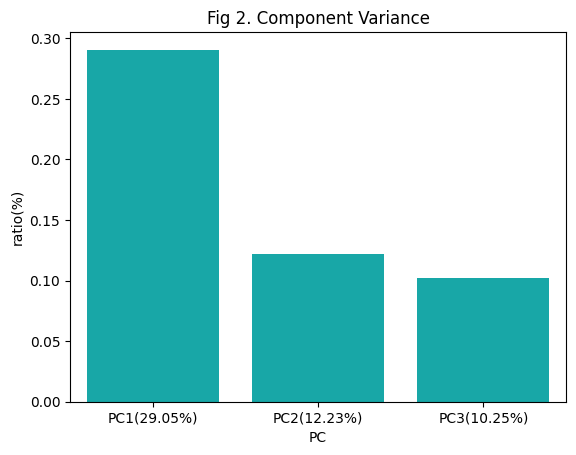

In [16]:
pca_comp_var(pca_ratio)

In [17]:
def pca_vectors_2D(pca_vectors, pca_ratio, df, Colo=None, save=False, Path=None):
    """Draw vectors of each PCA's composant in a 2D space

    Args:
        pca_vectors (ndarray): PCA's composant from 'perform_pca'
        pca_ratio (ndarray): PCA's ratio from 'perform_pca'
        Colo (list, optional): If 'pca_vectors_3D' was used, put the color list to have the same. Defaults to None.
        save (bool, optional): Set True to save the figure. Defaults to False.
        Path (String, optional): Path to save the figure (full path with type file). Defaults to None.

    Returns:
        Colors (list): Colors list creatre in this function
        Colo (list): Colors list if one was done as args
    """

    fig = plt.figure(figsize = (18, 10))
    plt.rcParams.update({'font.size': 14})

    x=np.linspace(start = -1, stop = 1, num = 500)
    y_positive = lambda x: np.sqrt(1-x**2) 
    y_negative = lambda x: -np.sqrt(1-x**2)
    plt.plot(x,list(map(y_positive, x)), color = 'maroon')
    plt.plot(x,list(map(y_negative, x)),color = 'maroon')

    x=np.linspace(start = -0.5, stop = 0.5, num = 500)
    y_positive = lambda x: np.sqrt(0.5**2-x**2) 
    y_negative = lambda x: -np.sqrt(0.5**2-x**2)
    plt.plot(x,list(map(y_positive, x)), color = 'maroon')
    plt.plot(x,list(map(y_negative, x)),color = 'maroon')

    x=np.linspace(start = -1, stop = 1, num = 30)
    plt.scatter(x, [0]*len(x), marker = '_', color = 'maroon')
    plt.scatter([0]*len(x), x, marker= '|' ,color = 'maroon')
    if Colo is None:
        Colors = []
    for i in range(len(pca_vectors[0])):
        xi = pca_vectors[0][i]
        yi = pca_vectors[1][i]
        if Colo is None:
            colors = "#"+''.join([random.choice('ABCDEF0123456789') for i in range(6)])
            try:
                Colors.append(colors)
            except:
                pass
            plt.arrow(0, 0, 
                    dx = xi, dy = yi, 
                    head_width = 0.03, head_length = 0.03, 
                    color = colors, length_includes_head = True
                    )
            add_string = f" ({round(xi, 4)} {round(yi, 4)})"
            plt.text(1.12, # pca_vectors[0, i]
                    1-0.1*i, #pca_vectors[1, i]
                    s = df.columns[i] + add_string,
                    c = colors
                    )
        else:
            plt.arrow(0,0, 
                    dx = xi, dy = yi, 
                    head_width = 0.03, head_length = 0.03, 
                    color = Colo[i], length_includes_head = True
                    )
            add_string = f" ({round(xi, 4)} {round(yi, 4)})"
            plt.text(1.12, # pca_vectors[0, i]
                    1-0.1*i, #pca_vectors[1, i]
                    s = df.columns[i] + add_string,
                    c = Colo[i]
                    )

    plt.xlabel(f"Component 1 ({round(pca_ratio[0]*100, 2)}%)")
    plt.ylabel(f"Component 2 ({round(pca_ratio[1]*100, 2)}%)")
    plt.title('Variable factor map (PCA)')
    fig.tight_layout()
    fig.show()

    if save:
        fig.savefig(Path)
    if Colo is None:
        return Colors
    else:
        return Colo

C:\Users\jpbso\AppData\Local\Temp\ipykernel_9752\310778160.py:70: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


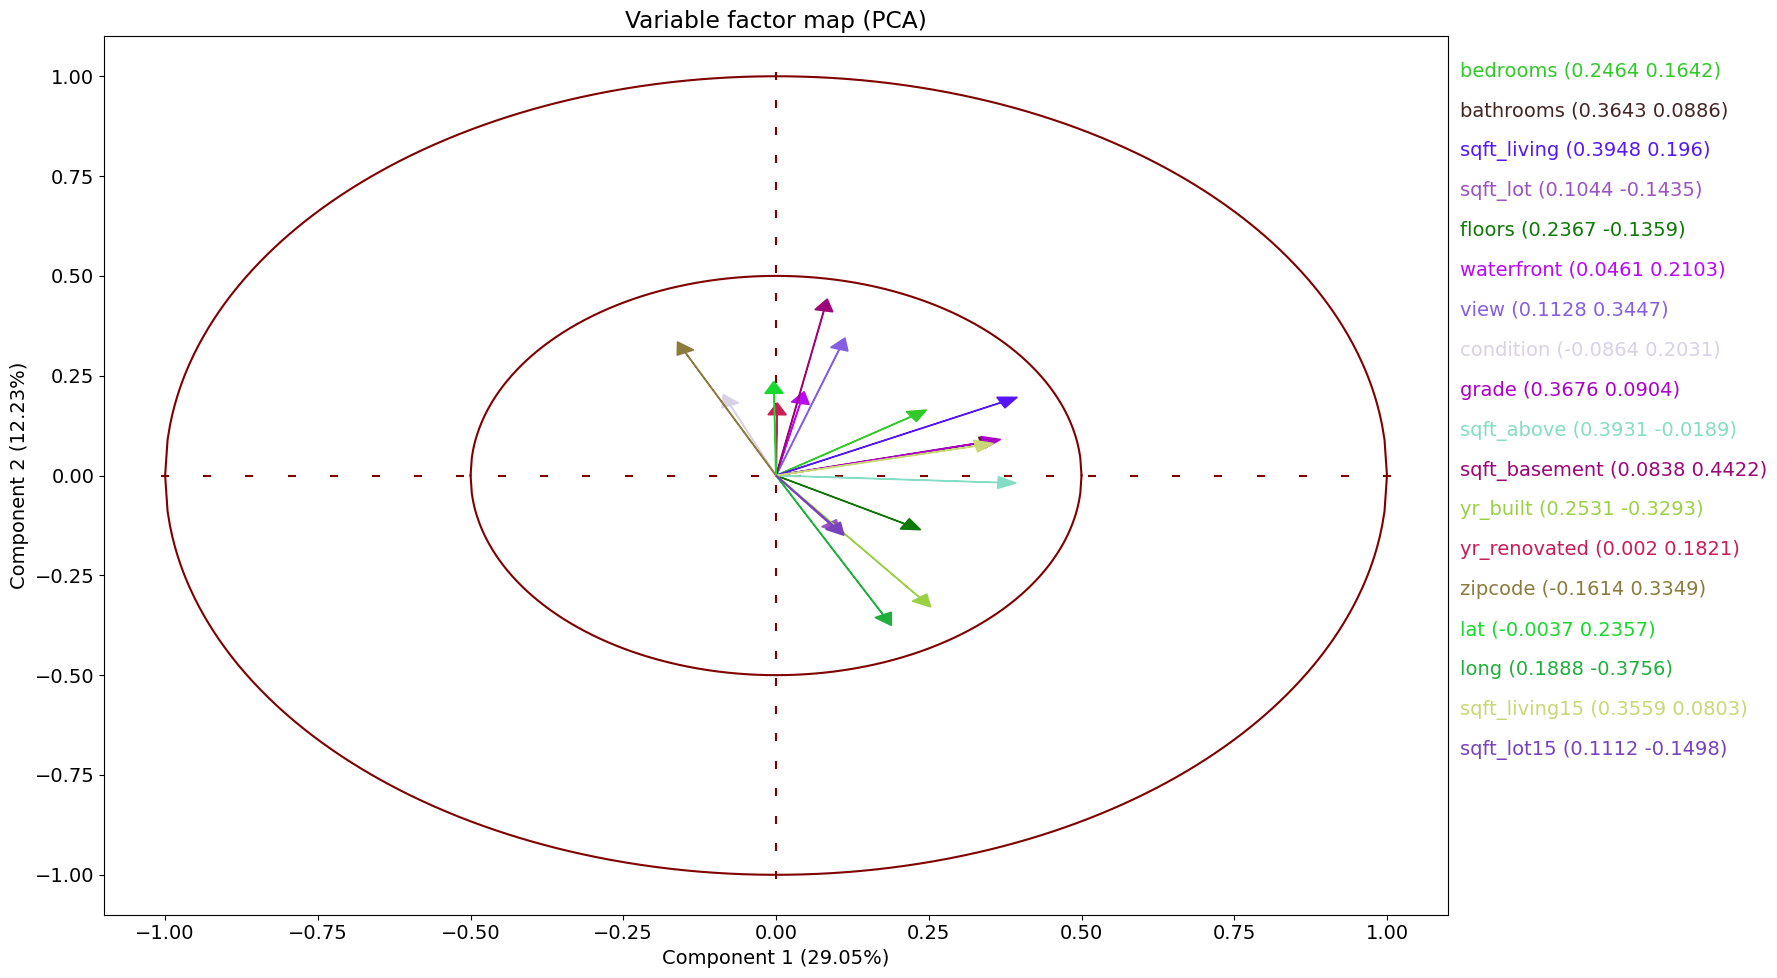

In [18]:
Colors = pca_vectors_2D(pca_vectors, pca_ratio, df.drop(['id', 'date', 'price'], axis=1))

PCA is an statistic analytic method to identify the influence of each data and the other in the model. If two arrows are close, it's because they potentialy gave the same information. Due to the high number of rows, the graph is not really lisible. To read it, we have to use coefficient on the side.  
We have two group of near arrow. First is about 'sqft_lot' and 'sqft_lot15'. They are already correlated so we will only keep one.
The second one is about 'bathrooms', 'grade' and 'sqft_living15'. Despite 'grade' depend on criteria that are in the dataset, we will keep it for now.

##### K Means

In [19]:
def elbow(pca_vectors, test_clust, save=False, Path=None):
    """Analysis method to find the optimal numbers of clusters. It will be the most break in the curve

    Args:
        pca_vectors (ndarry): PCA's composant from 'perform_pca'
        test_clust (int): Max clusters number to find the optimal number
        save (bool, optional): Set True to save the figure. Defaults to False.
        Path (String, optional): Path to save the figure. Defaults to None.
    """
    fig = plt.figure()
    Sum_of_squared_distances = []
    K = range(1,test_clust)
    for num_clusters in K:
        kmeans = KMeans(n_clusters = num_clusters)
        kmeans.fit(pca_vectors.T)
        Sum_of_squared_distances.append(kmeans.inertia_)
    plt.plot(K, Sum_of_squared_distances,'bx-')
    plt.xlabel('Values of K') 
    plt.ylabel('Sum of squared distances/Inertia') 
    plt.title('Elbow Method For Optimal k')
    plt.show()
    if save:
        fig.savefig(Path)

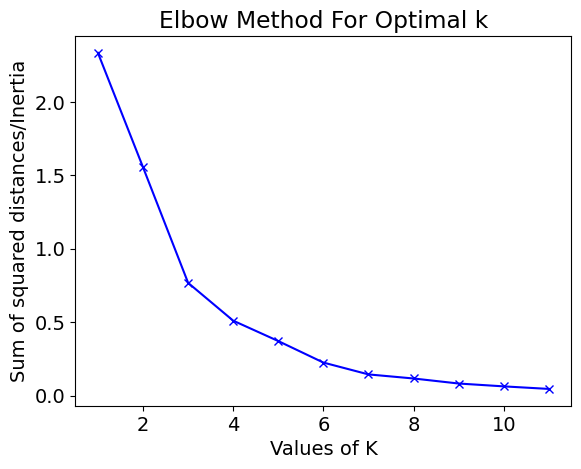

In [50]:
elbow(pca_vectors, 12)

In [21]:
def silhouette(pca_vectors, save=False, Path=None):
    """Analysis method to find the optimal cluster number with a bettter reliabilty

    Args:
        pca_vectors (ndarray): PCA's composant from 'perform_pca'
        save (bool, optional): Set True to save the figure. Defaults to False.
        Path (String, optional): Path to save the figure. Defaults to None.

    Returns:
        K: Optimal cluters's numbers
    """
    fig = plt.figure()
    range_n_clusters = list(range(2, len(pca_vectors[0])))
    silhouette_avg = []
    for num_clusters in range_n_clusters:
    
        # initialise kmeans
        kmeans = KMeans(n_clusters = num_clusters)
        kmeans.fit(pca_vectors.T)
        cluster_labels = kmeans.labels_

        # silhouette score
        silhouette_avg.append(silhouette_score(pca_vectors.T, cluster_labels))
    
    plt.plot(range_n_clusters, silhouette_avg,'bx-')
    plt.text(range_n_clusters[np.argmax(silhouette_avg)]+0.2,
                max(silhouette_avg)-0.002,
                s=str(range_n_clusters[np.argmax(silhouette_avg)])
            )
    plt.xlabel('Values of K') 
    plt.ylabel('Silhouette score') 
    plt.title('Silhouette analysis For Optimal k')
    plt.show()

    if save:
        fig.savefig(Path)
    
    return range_n_clusters[np.argmax(silhouette_avg)]

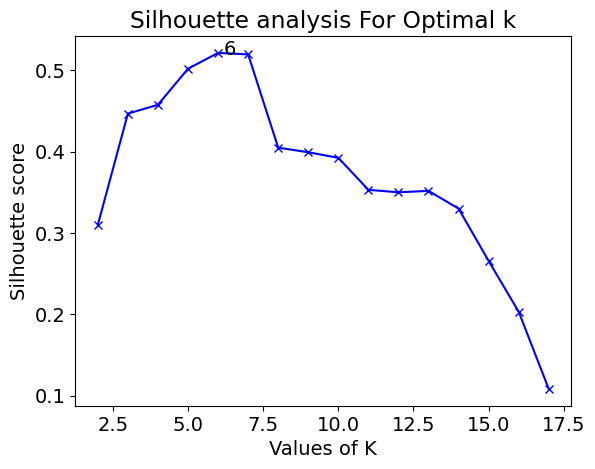

In [57]:
K = silhouette(pca_vectors)

In this part, I applied two method to have an information. I used those method to find the optimal clusters number. From elbow method, optimal number is 3 clusters but from silohouette method wich is more releable, indicate 6 clusters to be optimal. As the last method is more releable, I will select 6 data to have an optimal model influencing by all above observations.

##### GretL

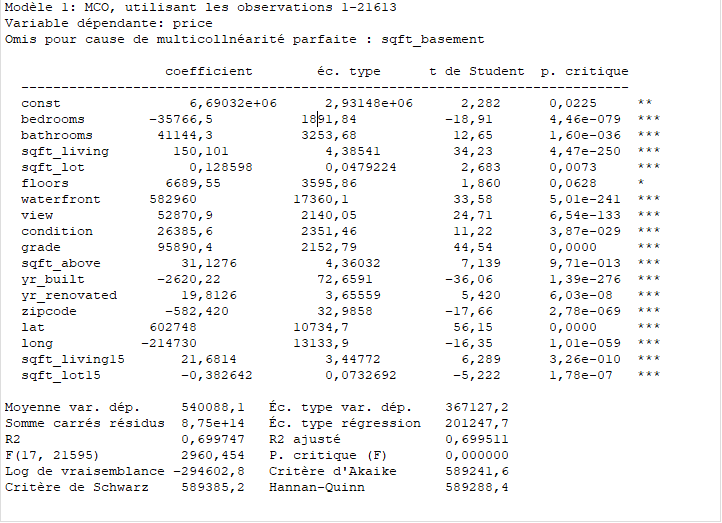

GretL is a logiciel wich can create fast modelisation from a document. In this case, I create a multilinear regression model. In a first time, I can notice that to avoid a perfect multicolinearity, GretL remove 'sqft_basement' data wich was colinear with 'sqft_living'.  
The most impactfull information overall is the p.value. I can interpreat this value as a quantification of the impact of a data on the model. The lower it is, the better it is. Generaly, we fix a threeshold at 5% (0.05) to consider if we keep the data or not. Here, only 'floors' data don't respects the requierements and when we retriggre it without this data, everything is good.  
The second information I looking for is the R² ajusted. With this information, we can tell at wich point we predict well our data. 1 is for perfect prediction and 0 for no prediction at all. Curently, I am neat the 70% prediction wich is a great score but it can better.

### Data Selection

With all observations above, I will now select 6 columns that will represent all the necessary information for the model.  
The only one mandatory is 'grade' as this is an overall indicator for a house.  
An other data that is independant and very representative of the state of a house is 'condition'. From a client point of view, this is important because he can determine if the house need renovation or no.  
For the location, we observe no colinearity and dependencies on the data related to that point. The one that demark itself especially on GretL is 'zipcode', so I decided to choose it.  
Concerning room data, we have 'floor', 'bedroom' and bathroom' columns. I already know that 'floor' doesn't respect our requierements as GretL show me. Now with the PCA and correlation matrix, I can see that 'bathroom' is the more independant and the most persuasive. So, I decided to go for it.  
For the last two data, I decided to select spacing data. GretL show that 'sqft_basement' and 'sqft_abovesquare' have perfect correlation but they are complementary, so I decided to go for 'sqft_abovesquare'. For the last one, related to PCA, the most influent is 'sqft_living15' so i pick it.

In summary, selected data are :
- grade
- zipcode
- condition
- bathroom
- sqft_abovesquare
- sqft_living15


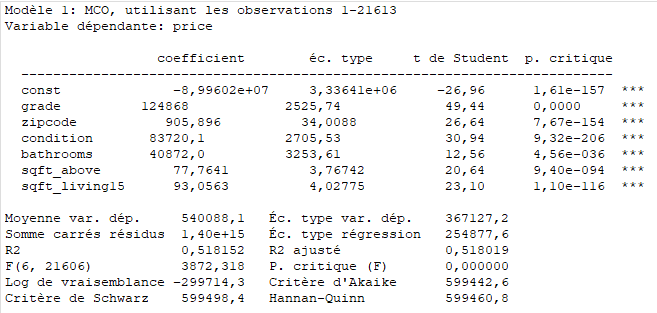

With the new GretL modelisation, I can see that all p.value are below 5% but the R² just drop at 51%. I could remade some analysis and select new data but I decided to thrust what I have done and my feelings also.  
Now I will create and compare different model for the price prediciton.

### Model Creation

In [2]:
df = pd.read_csv('../2_PreparedData/kc_house_data_clean.csv')

In [3]:
select_features = ['grade', 'zipcode', 'condition', 'bathrooms', 'sqft_above', 'sqft_living15']
scaler = StandardScaler()
y_data = df['price']
y_data_scaled = scaler.fit_transform(df[['price']])
X_data = df[select_features]
X_data_scaled = scaler.fit_transform(df[select_features])
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.2, random_state=2)
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_data_scaled, y_data_scaled, test_size = 0.2, random_state=2)

#### Linear Regression

In [10]:
lm = LinearRegression()
model = lm.fit(X_train, y_train)
y_predict = model.predict(X_test)

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [4]:
def metric (X_test, y_test, y_pred) :
    """Calcul evaluation metrics for models

    Args:
        X_test (DataFrame): Test dataset
        y_test (DataFrame): Label test dataset
        y_pred (DataFrame): Model prediction

    Returns:
        String: Return a print with all metric values
    """
    k = X_test.shape[1]
    n = len(X_test)
    
    MSE = mean_squared_error(y_test, y_pred)
    MAE = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

    print('MSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 
    return MSE, MAE, r2, adj_r2

In [26]:
metric(X_test, y_test, y_predict)

MSE = 63703109463.11129 
MAE = 163053.9230025668 
R2 = 0.5437008006657718 
Adjusted R2 = 0.5430664644294405


#### RandomForest

In [27]:
rf = RandomForestRegressor(n_estimators=800)
model_rf = rf.fit(X_train,y_train)
y_predict_rf = model_rf.predict(X_test)

In [28]:
metric(X_test, y_test, y_predict_rf)

MSE = 32500651610.37166 
MAE = 92757.04221714889 
R2 = 0.7672009822967757 
Adjusted R2 = 0.7668773506688287


#### SVM

In [29]:
svr = SVR()
model_svr = svr.fit(X_train_scaled,y_train_scaled)
y_predict_svr = model_svr.predict(X_test_scaled)

c:\Users\jpbso\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [30]:
metric(X_test_scaled, y_test_scaled, y_predict_svr)

MSE = 0.37663011946602976 
MAE = 0.34949394145902385 
R2 = 0.6364056346248181 
Adjusted R2 = 0.6359001744319889


#### Gradient Boost

In [31]:
grad = GradientBoostingRegressor(
    n_estimators=800, learning_rate=0.1, max_depth=5, random_state=2,
    loss='squared_error')
model_grad = grad.fit(X_train,y_train)
y_predict_grad = model_grad.predict(X_test)

In [32]:
metric(X_test, y_test, y_predict_grad)

MSE = 30560034599.619904 
MAE = 87505.55031754547 
R2 = 0.7811014338710144 
Adjusted R2 = 0.7807971263184718


In [33]:
grad_2 = XGBRegressor(n_estimators=800, max_depth=5, eta=0.01)
model_grad_2 = grad_2.fit(X_train,y_train)
y_predict_grad_2 = model_grad_2.predict(X_test)

In [34]:
metric(X_test, y_test, y_predict_grad_2)

MSE = 31567850549.510548 
MAE = 96812.1979708825 
R2 = 0.7738825458938481 
Adjusted R2 = 0.7735682028158506


#### CNN

In [35]:
model_CNN = Sequential()
model_CNN.add(Dense(18, input_dim = 6, activation = 'relu'))
model_CNN.add(Dense(12, activation = 'relu'))
model_CNN.add(Dense(1, activation = 'linear'))
model_CNN.compile(optimizer = 'adam', loss = 'mean_absolute_error')

In [36]:
epochs_hist = model_CNN.fit(X_train_scaled, y_train_scaled, epochs = 100, batch_size = 50, verbose = 1, validation_split = 0.2)

Epoch 1/100
277/277 [==============================] - 1s 3ms/step - loss: 0.4736 - val_loss: 0.4048
Epoch 2/100
277/277 [==============================] - 1s 2ms/step - loss: 0.3921 - val_loss: 0.3883
Epoch 3/100
277/277 [==============================] - 1s 2ms/step - loss: 0.3811 - val_loss: 0.3810
Epoch 4/100
277/277 [==============================] - 1s 2ms/step - loss: 0.3751 - val_loss: 0.3780
Epoch 5/100
277/277 [==============================] - 1s 2ms/step - loss: 0.3716 - val_loss: 0.3799
Epoch 6/100
277/277 [==============================] - 1s 2ms/step - loss: 0.3679 - val_loss: 0.3708
Epoch 7/100
277/277 [==============================] - 1s 3ms/step - loss: 0.3653 - val_loss: 0.3685
Epoch 8/100
277/277 [==============================] - 1s 3ms/step - loss: 0.3623 - val_loss: 0.3673
Epoch 9/100
277/277 [==============================] - 1s 3ms/step - loss: 0.3608 - val_loss: 0.3673
Epoch 10/100
277/277 [==============================] - 1s 3ms/step - loss: 0.3590 - val_lo

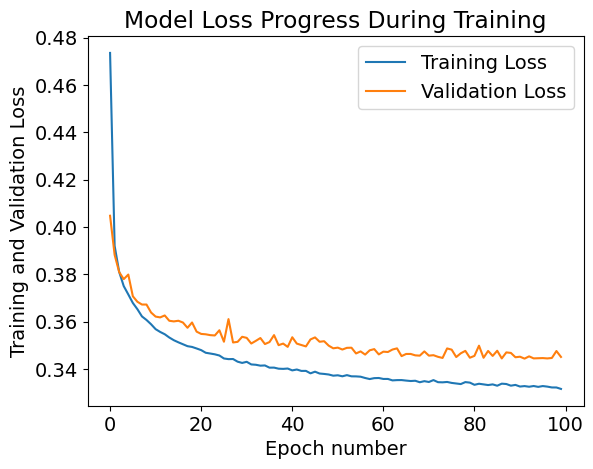

In [37]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.ylabel('Training and Validation Loss')
plt.xlabel('Epoch number')
plt.legend(['Training Loss', 'Validation Loss'])

In [38]:
y_predict_CNN = model_CNN.predict(X_test_scaled)

136/136 [==============================] - 0s 835us/step


In [39]:
metric(X_test_scaled, y_test_scaled, y_predict_CNN)

MSE = 0.32678273126140417 
MAE = 0.3356939766369207 
R2 = 0.6845277272114836 
Adjusted R2 = 0.6840891652011196


### MLFlow Tracking

In [11]:
CNN_model = Sequential([
            Dense(18, input_dim = 6, activation = 'relu'),
            Dense(12, activation = 'relu'),
            Dense(1, activation = 'linear')
        ])

models = [
    (
        "Linear Regression",
        LinearRegression(),
        (X_train, y_train),
        (X_test, y_test)
    ),
    #(
    #    "Random Forest",
    #    RandomForestRegressor(n_estimators=800),
    #    (X_train, y_train),
    #    (X_test, y_test)
    #),
    (
        "SVM Regressor",
        SVR(),
        (X_train_scaled, y_train_scaled),
        (X_test_scaled, y_test_scaled)
    ),
    (
        "Gradient Boost",
        GradientBoostingRegressor(
            n_estimators=800, learning_rate=0.1, max_depth=5, random_state=2,
            loss='squared_error'
            ),
        (X_train, y_train),
        (X_test, y_test)
    ),
    (
        "XGBoost Regressor",
        XGBRegressor(n_estimators=800, max_depth=5, eta=0.01),
        (X_train, y_train),
        (X_test, y_test)
    ),
    (
        "CNN Regressor",
        Sequential([
            Dense(18, input_dim = 6, activation = 'relu'),
            Dense(12, activation = 'relu'),
            Dense(1, activation = 'linear')
        ]),
        (X_train_scaled, y_train_scaled),
        (X_test_scaled, y_test_scaled)
    )
    
]

In [13]:
reports = []

for model_name, model, train_set, test_set in models:
    X_train = train_set[0]
    y_train = train_set[1]
    X_test = test_set[0]
    y_test = test_set[1]

    print(model_name)
    if "CNN" in model_name:
        model.compile(optimizer = 'adam', loss = 'mean_absolute_error')
        model.fit(X_train_scaled, y_train_scaled, epochs = 100, batch_size = 50, verbose = 1, validation_split = 0.2)
    else:
        model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    MSE, MAE, r2, adj_r2 = metric(X_test, y_test, y_pred)
    reports.append({'MSE': MSE, 'MAE': MAE, 'R²': r2, 'Adjusted R²': adj_r2})
    

LinearRegression()
MSE = 0.4726586501970934 
MAE = 0.4441449634398193 
R2 = 0.5437008006657766 
Adjusted R2 = 0.5430664644294454
SVR()


c:\Users\jpbso\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MSE = 0.37663011946602976 
MAE = 0.34949394145902385 
R2 = 0.6364056346248181 
Adjusted R2 = 0.6359001744319889
GradientBoostingRegressor(max_depth=5, n_estimators=800, random_state=2)


c:\Users\jpbso\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


MSE = 0.2280279586052865 
MAE = 0.23896916496057521 
R2 = 0.7798644436232736 
Adjusted R2 = 0.7795584164364663
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eta=0.01, eval_metric=None,
             feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=800,
             n_jobs=None, num_parallel_tree=None, ...)
MSE = 0.23422442645101527 
MAE = 0.2637081863792672 
R2 = 0.773882445165132 
Adjusted R2 = 0.7735681019471039
Epoch 1/100
277/277 [========================

In [18]:
mlflow.set_tracking_uri(uri="http://localhost:5000")
try:
    mlflow.set_experiment(experiment_name="Price Prediction")
except mlflow.MlflowException:
    mlflow.get_experiment_by_name("Price Prediction")


for i, element in enumerate(models):
    model_name = element[0]
    model = element[1]
    report = reports[i]
    
    with mlflow.start_run(run_name=model_name):
        if not "CNN" in model_name:
            mlflow.log_params(model.get_params())
        mlflow.log_metrics(report)

        if "XGB" in model_name:
            mlflow.xgboost.log_model(model, "model")
        elif "CNN" in model_name:
            mlflow.keras.log_model(model, "model")
        else:
            mlflow.sklearn.log_model(model, "model")

2024/09/10 10:52:59 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/09/10 10:52:59 INFO mlflow.tracking._tracking_service.client: 🏃 View run Linear Regression at: http://localhost:5000/#/experiments/0/runs/65f30092ebd24dcdb45373f4a446e85a.
2024/09/10 10:52:59 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/0.
2024/09/10 10:53:01 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/09/10 10:53:01 INFO mlflow.tracking._tracking_service.client: 🏃 View run SVM Regressor at: http://localhost:5000/#/experiments/0/runs/6d7cd729d65a4b1b866721ec78f4f143.
2024/09/10 10:53:01 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/0.
20

INFO:tensorflow:Assets written to: C:\Users\jpbso\AppData\Local\Temp\tmpcl13etf_\model\data\model\assets


2024/09/10 10:53:16 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/09/10 10:53:16 INFO mlflow.tracking._tracking_service.client: 🏃 View run CNN Regressor at: http://localhost:5000/#/experiments/0/runs/08ae64acf7644ead8dd298e82e8b7c0d.
2024/09/10 10:53:16 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/0.


I had created several models to compare results. Each model was tested with differents hyper-parameters and only the best of each was kept. Here is the list of the different model with their adjusted R² score (based on script model, not mlflow):  
- Linear Regression : 0.54
- RandomForest : 0.76
- SVM : 0.63
- Gradient Boost (sklearn) : 0.78
- Gradient Boost (xgboost) : 0.77
- CNN : 0.68

Among these models, the most convincing one is Random Forest and Gradient Boost. To decide the one we choose between both, we can compare other things like compilation time, model speed, model space, ...

## Conclusion and perspective

I obtain three similar model in results. For a normal deployement, we should other parameters such response speed. In this case compilation time is not very impactfull but for larger model, it is something to consider. We can also try hyper-parameters combinaison to find an optimiser model. Also try differents combinaison of data columns could be a great idea as we saw on GretL. When I have all the data select, the result was better than the one with the reduce selection. So it could be possible that the obtain results could be better with all the data but compilation time will be increased. I can also try to use different analysis method but use too many is not always the best thing. It is like have to many point of view on something, you can not determine the truth of it.  
In definitve, we can predict the right price with 80% of precision wich is a great score. But have a human being to ensure the predict is probably something to consider, for the customer but also to fine-tune the model.